# Face Recognition Using SVM 

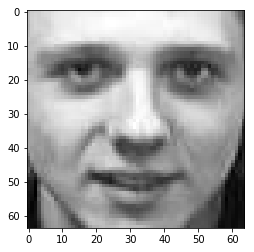

In [7]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


image = mpimg.imread("./HW3/Face Data/12.jpg")
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

In [8]:
JP = pd.read_csv('./HW3/Face Data/label.csv')

In [11]:
FD=fetch_olivetti_faces()
JPface=FD.data
print(JPface.shape)

(400, 4096)


In [12]:
J_face = preprocessing.scale(JPface)
print(J_face)

[[-0.49990347 -0.35118142 -0.3029615  ... -0.8982754  -0.8315195
  -0.85045695]
 [ 0.30149916  0.19463976  0.18568613 ... -0.8982754  -0.87658525
  -0.8733619 ]
 [-0.4541091  -0.17651856  0.07945846 ... -0.9643534  -0.8991181
  -0.8733619 ]
 ...
 [ 0.5533685   0.5221326   0.67433375 ... -0.76611936 -0.8991181
  -0.66721827]
 [-1.0265394  -1.1371639  -1.3227477  ...  1.3483768   1.5118996
   1.6232663 ]
 [ 0.64495724  0.15097412 -1.0040644  ...  0.20302469  0.22752574
   0.40930957]]


C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [13]:
X_train, X_test, y_train, y_test = train_test_split(J_face, JP, test_size=0.25, random_state=5)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(300, 4096)
(300, 1)
(100, 4096)
(100, 1)


In [14]:
from sklearn.decomposition import PCA
k = 50 # k is the number of components (new features) after dimensionality reduction 
my_pca = PCA(n_components = k)
# X_Train is feature matrix of training set before dimensionality reduction,
# X_Train_New is feature matrix of training set after dimensionality reduction: 
X_train_new = my_pca. fit_transform(X_train)
X_test_new = my_pca. transform(X_test)

In [15]:
from sklearn import svm
svc = svm.SVC(C=1, kernel='rbf', gamma=0.0005, random_state=1)
svc.fit(X_test, y_test)

C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0005, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
from sklearn import metrics

y_pridict = svc.predict(X_test)
print(y_pridict)

[16 32  4 24 29 38 21 12 23 28  9 13 24 21 10  1 36 11  4 16  8 26 19 12
 35  0 21 36  8 14  7 33 23  0 20  1 38 25  8 23  9 25 13 13 38 25 26 11
  4 36 26 36 13 16 23 36  4 36  5  6 14  9 13  7  9 22  6  6 24  0  4 31
 31 11 14 22 16 34 11 25 11  0  0 25  5 34 11 18 22 11  5  1 16 24 36 33
 11 13 38 20]


In [17]:
#acc = svm.score(y_test,y_pridict)
#print('The accuracy is: ', acc)
print("Accuracy:",metrics.accuracy_score(y_test, y_pridict))


from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pridict))  
#print(classification_report(y_test,y_pridict))  



Accuracy: 0.9
[[4 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 0]]


In [18]:
X_normalized_pca = my_pca.fit_transform(J_face)

In [19]:
from sklearn.model_selection import GridSearchCV

Cs = [0.1, 1, 10, 100, 1e3, 5e3, 1e4, 5e4, 1e5]
gammas = [0.0005]
svc = svm.SVC(C=Cs, kernel='rbf', gamma=gammas, random_state=1)
param_grid = {'C': Cs, 'gamma' : gammas}
grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv=10, scoring='accuracy')
grid_result = grid.fit(X_normalized_pca, JP)

C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abhilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [20]:
print(grid_result.best_score_, grid_result.best_params_)

0.0425 {'C': 0.1, 'gamma': 0.0005}
